In [1]:
import torch

from IPython.display import HTML
from math import pi
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


sns.set_theme(context="talk", style="whitegrid")

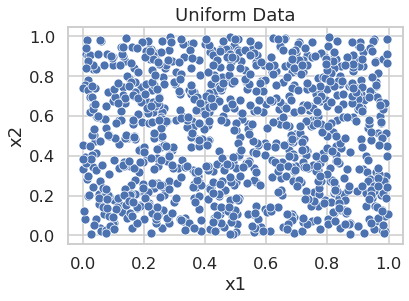

In [33]:
N = 1000

nx = 2 
X = torch.rand(N, nx)
x1 = X[:, 0]
x2 = X[:, 1]

df = pd.DataFrame({"x1": x1, "x2": x2})
ax = sns.scatterplot(data=df, x="x1", y="x2")
ax.set_title("Uniform Data");

$$y = -0.6x + 0.8$$

$$x_2 + 0.6x_1 - 0.8=0$$

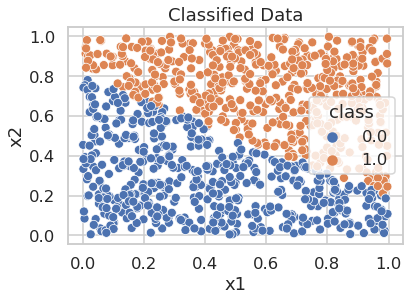

In [34]:
Y = torch.zeros(N, 1)
Y[x2 + 0.6 * x1 - 0.8 > 0] = 1

df = pd.DataFrame({"x1": x1, "x2": x2, "class": Y.squeeze().numpy()})
ax = sns.scatterplot(data=df, x="x1", y="x2", hue="class")
ax.set_title("Classified Data");

In [35]:
N_valid = int(N * 0.2)
X_valid = X[:N_valid, :]
Y_valid = Y[:N_valid, :]

X_train = X[N_valid:, :]
Y_train = Y[N_valid:, :]

X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape

(torch.Size([800, 2]),
 torch.Size([800, 1]),
 torch.Size([200, 2]),
 torch.Size([200, 1]))

In [36]:
def bce_loss(Yhat, Y):
    return -(Y * torch.log(Yhat) + (1 - Y) * torch.log(1 - Yhat))

In [73]:
# Parameters
w = torch.randn(nx, 1)
b = torch.zeros(1)

ws = [w.clone()]
bs = [b.clone()]

# Hyper-parameters
learning_rate = 10
num_epochs = 100

# Formatting parameters
print_step = 5
prev_accuracy = 0

for epoch in range(num_epochs):
    
    # Forward propagation
    Yhat = torch.sigmoid(X_train @ w + b)

    # Backpropagation
    losses = bce_loss(Yhat, Y_train)
    loss = losses.mean()

    dZ = Yhat - Y_train
    dw = (1 / N) * dZ.T @ X_train
    db = dZ.mean()

    # Update parameters
    w -= learning_rate * dw.T
    b -= learning_rate * db

    # Compute and print metrics
    if epoch % print_step == 0:

        Yhat_valid = torch.sigmoid(X_valid @ w + b)
        accuracy = 1 - (Yhat_valid - Y_valid).abs().round().mean()
        e = f"{epoch:>4}/{num_epochs}"
        c = f"{loss:0.2f}"
        a = f"{accuracy:0.2f}"
        print(f"{e}: Loss={c}, Accuracy={a}")

        if accuracy > prev_accuracy:
            ws.append(w.clone())
            bs.append(b.clone())
            prev_accuracy = accuracy

Yhat_valid = torch.sigmoid(X_valid @ w + b)
accuracy = 1 - (Yhat_valid - Y_valid).abs().round().mean()
print(f"Final accuracy: {accuracy:0.2f}")

   0/100: Loss=0.79, Accuracy=0.36
   5/100: Loss=0.83, Accuracy=0.64
  10/100: Loss=1.06, Accuracy=0.49
  15/100: Loss=0.71, Accuracy=0.67
  20/100: Loss=0.48, Accuracy=0.75
  25/100: Loss=0.36, Accuracy=0.88
  30/100: Loss=0.31, Accuracy=0.85
  35/100: Loss=0.29, Accuracy=0.87
  40/100: Loss=0.29, Accuracy=0.88
  45/100: Loss=0.28, Accuracy=0.87
  50/100: Loss=0.28, Accuracy=0.87
  55/100: Loss=0.28, Accuracy=0.87
  60/100: Loss=0.28, Accuracy=0.87
  65/100: Loss=0.28, Accuracy=0.87
  70/100: Loss=0.28, Accuracy=0.87
  75/100: Loss=0.28, Accuracy=0.87
  80/100: Loss=0.28, Accuracy=0.87
  85/100: Loss=0.27, Accuracy=0.87
  90/100: Loss=0.27, Accuracy=0.87
  95/100: Loss=0.27, Accuracy=0.87
Final accuracy: 0.87


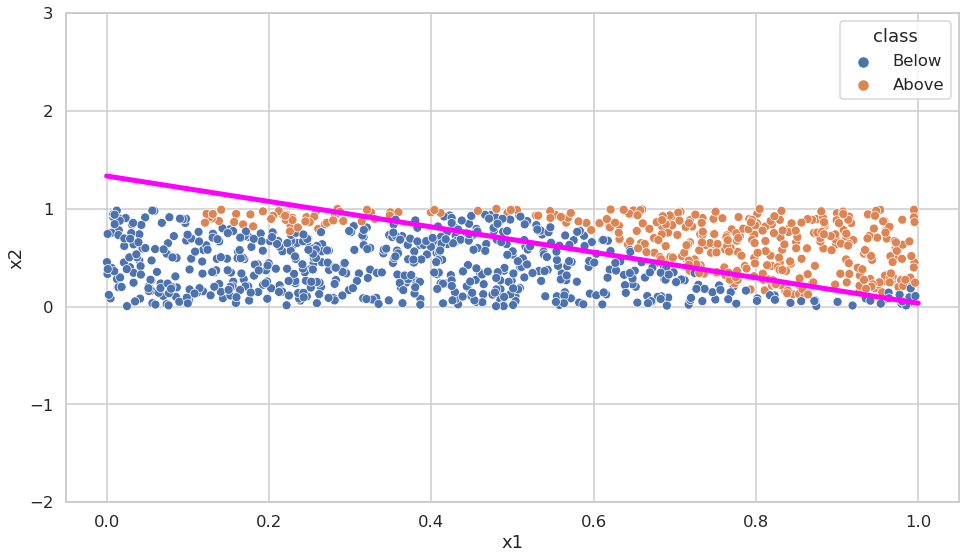

In [74]:
fig, ax = plt.subplots(figsize=(16, 9))

ax = sns.scatterplot(data=df, x="x1", y="x2", hue="class", ax=ax)

w1, w2 = w

x_line = torch.tensor([0, 1])
y_line = ((-w1 * x_line - b) / w2).detach().numpy()

(ln,) = ax.plot(x_line, y_line, color="fuchsia", linewidth=5)
ax.set_ylim((-2, 3))


def set_frame_data(i):
    y_line = ((-ws[i][0] * x_line - bs[i]) / ws[i][1]).detach().numpy()
    ln.set_data(x_line, y_line)
    return (ln,)


anim = FuncAnimation(fig, set_frame_data, frames=len(ws))

In [75]:
HTML(anim.to_jshtml())

In [55]:
def mse_loss(Yhat, Y):
    return (Yhat - Y).pow(2)

loss_function = mse_loss

# Parameters
w = torch.randn(nx, 1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

ws = [w.clone()]
bs = [b.clone()]

# Hyper-parameters
learning_rate = 10
num_epochs = 100

# Formatting parameters
print_step = 5
prev_accuracy = 0

for epoch in range(num_epochs):

    # Forward propagation
    Yhat = torch.sigmoid(X_train @ w + b)

    # Backpropagation
    w.grad = None
    b.grad = None
    losses = loss_function(Yhat, Y_train)
    loss = losses.mean()
    loss.backward()

    # Update parameters
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # Compute and print metrics
    if epoch % print_step == 0:

        Yhat_valid = torch.sigmoid(X_valid @ w + b)
        accuracy = 1 - (Yhat_valid - Y_valid).abs().round().mean()
        e = f"{epoch:>4}/{num_epochs}"
        c = f"{loss:0.2f}"
        a = f"{accuracy:0.2f}"
        print(f"{e}: Loss={c}, Accuracy={a}")

        if accuracy > prev_accuracy:
            ws.append(w.clone())
            bs.append(b.clone())
            prev_accuracy = accuracy

Yhat_valid = torch.sigmoid(X_valid @ w + b)
accuracy = 1 - (Yhat_valid - Y_valid).abs().round().mean()
print(f"Final accuracy: {accuracy:0.2f}")

   0/100: Loss=0.34, Accuracy=0.53
   5/100: Loss=0.19, Accuracy=0.93
  10/100: Loss=0.14, Accuracy=0.85
  15/100: Loss=0.11, Accuracy=0.93
  20/100: Loss=0.10, Accuracy=0.96
  25/100: Loss=0.09, Accuracy=0.96
  30/100: Loss=0.08, Accuracy=0.96
  35/100: Loss=0.08, Accuracy=0.96
  40/100: Loss=0.07, Accuracy=0.96
  45/100: Loss=0.07, Accuracy=0.98
  50/100: Loss=0.07, Accuracy=0.98
  55/100: Loss=0.06, Accuracy=0.98
  60/100: Loss=0.06, Accuracy=0.98
  65/100: Loss=0.06, Accuracy=0.98
  70/100: Loss=0.06, Accuracy=0.99
  75/100: Loss=0.06, Accuracy=0.99
  80/100: Loss=0.06, Accuracy=0.99
  85/100: Loss=0.06, Accuracy=0.99
  90/100: Loss=0.05, Accuracy=0.99
  95/100: Loss=0.05, Accuracy=1.00
Final accuracy: 1.00


In [62]:
a = torch.rand(1, requires_grad=True)
b = a ** 3
b.backward()

In [63]:
a

tensor([0.2793], requires_grad=True)

In [64]:
a.grad

tensor([0.2340])

In [65]:
a

tensor([0.2793], requires_grad=True)

In [66]:
b

tensor([0.0218], grad_fn=<PowBackward0>)

In [67]:
3 * a * a

tensor([0.2340], grad_fn=<MulBackward0>)

In [71]:
a = torch.rand(1, requires_grad=True)
b = a ** 3
c = a + 2
c.backward()
a.grad

tensor([1.])

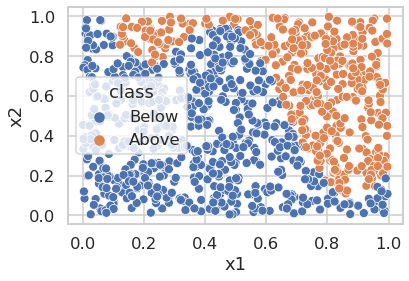

In [72]:
Y = torch.zeros(N, 1)
noise = 0.25 * torch.sin(x1 * 3 * pi)
Y[x2 + x1 - 1.2 + noise > 0] = 1

classes = ["Above" if target == 1 else "Below" for target in Y]
df = pd.DataFrame({"x1": x1, "x2": x2, "class": classes})
ax = sns.scatterplot(data=df, x="x1", y="x2", hue="class")

N_valid = int(N * 0.2)
X_valid = X[:N_valid, :]
Y_valid = Y[:N_valid, :]

X_train = X[N_valid:, :]
Y_train = Y[N_valid:, :]

In [82]:
# layer_sizes = (nx, 1)
layer_sizes = (nx, 4, 4, 4, 1)

layers_except_last = [
    torch.nn.Sequential(torch.nn.Linear(nlminus1, nl), torch.nn.ReLU())
    for nl, nlminus1 in zip(layer_sizes[1:-1], layer_sizes)
]
last_layer = torch.nn.Sequential(torch.nn.Linear(layer_sizes[-2], layer_sizes[-1]), torch.nn.Sigmoid())
net = torch.nn.Sequential(*(layers_except_last + [last_layer]))

print(net)

loss_function = torch.nn.BCELoss()

learning_rate = 0.01
num_epochs = 10000
print_step = 50
prev_accuracy = 0

for epoch in range(num_epochs):

    # Forward propagation
    Yhat = net(X_train)

    # Backpropagation
    net.zero_grad()
    losses = bce_loss(Yhat, Y_train)
    loss = losses.mean()
    loss.backward()

    # Update parameters
    with torch.no_grad():
        for param in net.parameters():
            param -= learning_rate * param.grad

    # Compute and print metrics
    if epoch % print_step == 0:

        with torch.no_grad():
            Yhat_valid = net(X_valid)

        accuracy = 1 - (Yhat_valid - Y_valid).abs().round().mean()
        e = f"{epoch:>4}/{num_epochs}"
        c = f"{loss:0.2f}"
        a = f"{accuracy:0.2f}"
        print(f"{e}: Loss={c}, Accuracy={a}")

        if accuracy > prev_accuracy:
            ws.append(w.clone())
            bs.append(b.clone())
            prev_accuracy = accuracy

with torch.no_grad():
    Yhat_valid = net(X_valid)
accuracy = 1 - (Yhat_valid - Y_valid).abs().round().mean()
print(f"Final accuracy: {accuracy:0.2f}")

Sequential(
  (0): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
  )
  (1): Sequential(
    (0): Linear(in_features=4, out_features=4, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=4, out_features=4, bias=True)
    (1): ReLU()
  )
  (3): Sequential(
    (0): Linear(in_features=4, out_features=1, bias=True)
    (1): Sigmoid()
  )
)
   0/10000: Loss=0.67, Accuracy=0.64
  50/10000: Loss=0.66, Accuracy=0.64
 100/10000: Loss=0.66, Accuracy=0.64
 150/10000: Loss=0.66, Accuracy=0.64
 200/10000: Loss=0.66, Accuracy=0.64
 250/10000: Loss=0.66, Accuracy=0.64
 300/10000: Loss=0.66, Accuracy=0.64
 350/10000: Loss=0.66, Accuracy=0.64
 400/10000: Loss=0.66, Accuracy=0.64
 450/10000: Loss=0.66, Accuracy=0.64
 500/10000: Loss=0.66, Accuracy=0.64
 550/10000: Loss=0.66, Accuracy=0.64
 600/10000: Loss=0.66, Accuracy=0.64
 650/10000: Loss=0.66, Accuracy=0.64
 700/10000: Loss=0.66, Accuracy=0.64
 750/10000: Loss=0.66, Accuracy=0.64
 80